### Import Libraries

In [1]:
#Model Building
import tensorflow as tf
from tensorflow import keras

#Input Data
from keras.datasets import mnist

#Handling Data
import numpy as np
import pandas as pd

#Building Architecture
from keras.models import Sequential
from keras.layers import Flatten,Dense

#Visualization
import matplotlib.pyplot as plt
%matplotlib inline

#Warnings
import warnings
warnings.filterwarnings('ignore')

### Import Data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data(path='mnist.npz')

### Data Understanding

In [3]:
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

In [4]:
X_train.std(),X_test.std()

(78.56748998339798, 79.17246322228644)

In [5]:
pd.set_option('max_columns',None)

In [6]:
pd.DataFrame(X_train[7800])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,32,37,102,128,108,159,146,128,37,3,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,71,160,245,253,253,254,253,244,249,253,254,203,109,4,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,195,253,207,155,72,72,72,36,57,72,98,214,253,151,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,241,235,0,0,0,0,0,0,0,0,0,0


In [7]:
y_train[7800]

3

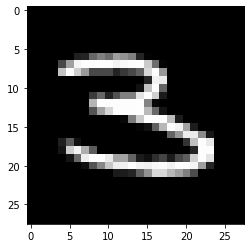

In [8]:
plt.imshow(X=X_train[7800],cmap='gray')
plt.show()

### Model Building

#### Step 1 : Building Architecture

In [9]:
model=Sequential()

In [10]:
model.add(Flatten(input_shape=(28,28,1)))
model.add(Dense(units=50,activation='relu'))
model.add(Dense(units=10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 10)                510       
                                                                 
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


#### Step 2 : Model Compile

In [11]:
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics='accuracy')

### Model Training

In [12]:
training_history=model.fit(x=X_train,y=y_train,batch_size=32,epochs=10,validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.1301 - accuracy: 0.8066 - val_loss: 0.6486 - val_accuracy: 0.8702
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6143 - accuracy: 0.8959 - val_loss: 0.5691 - val_accuracy: 0.9019
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5145 - accuracy: 0.9147 - val_loss: 0.5787 - val_accuracy: 0.9096
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4858 - accuracy: 0.9209 - val_loss: 0.5528 - val_accuracy: 0.9136
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4539 - accuracy: 0.9283 - val_loss: 0.5521 - val_accuracy: 0.9177
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4455 - accuracy: 0.9320 - val_loss: 0.5700 - val_accuracy: 0.9303
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4321 - accuracy: 0.9351 - val_loss: 0.5612 - val_accuracy:

### Model Testing

In [13]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.7224 - accuracy: 0.9327


[0.7224488854408264, 0.932699978351593]

### Model Prediction

In [14]:
y_pred=model.predict(X_test)

313/313 [==============================] - 0s 763us/step


In [15]:
y_test[1999]

5

In [16]:
np.argmax(y_pred[1999])

5

### Model Performance

In [17]:
training_history.history

{'loss': [2.1301345825195312,
  0.6143291592597961,
  0.5144569277763367,
  0.4857880473136902,
  0.4538717269897461,
  0.44546055793762207,
  0.43211859464645386,
  0.41801774501800537,
  0.415823370218277,
  0.4005202651023865],
 'accuracy': [0.8066166639328003,
  0.895883321762085,
  0.9147166609764099,
  0.9208999872207642,
  0.9282666444778442,
  0.9319833517074585,
  0.9351000189781189,
  0.9360833168029785,
  0.9373666644096375,
  0.9402833580970764],
 'val_loss': [0.6485632658004761,
  0.5691043734550476,
  0.5786703824996948,
  0.5527707934379578,
  0.5520957708358765,
  0.5699647665023804,
  0.5611538290977478,
  0.6436039805412292,
  0.6516970992088318,
  0.7224488854408264],
 'val_accuracy': [0.870199978351593,
  0.9018999934196472,
  0.909600019454956,
  0.9136000275611877,
  0.9176999926567078,
  0.9302999973297119,
  0.9259999990463257,
  0.9275000095367432,
  0.9261999726295471,
  0.932699978351593]}

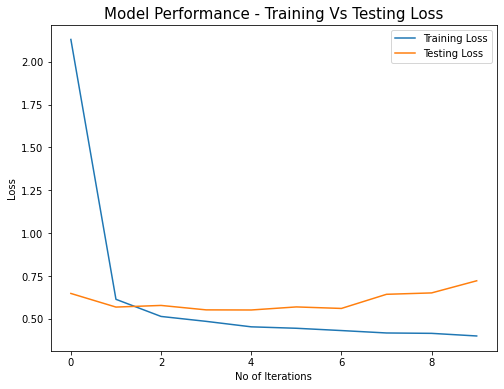

In [18]:
plt.figure(figsize=(8,6))
plt.plot(training_history.history['loss'],label='Training Loss')
plt.plot(training_history.history['val_loss'],label='Testing Loss')
plt.title('Model Performance - Training Vs Testing Loss',size=15)
plt.xlabel('No of Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

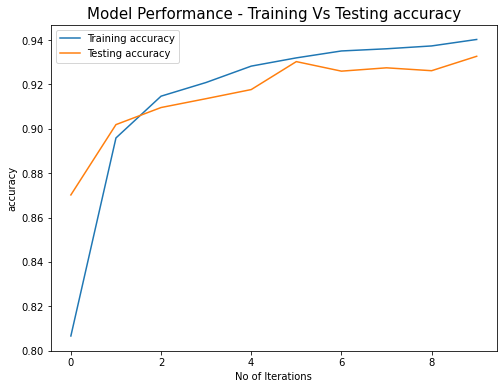

In [19]:
plt.figure(figsize=(8,6))
plt.plot(training_history.history['accuracy'],label='Training accuracy')
plt.plot(training_history.history['val_accuracy'],label='Testing accuracy')
plt.title('Model Performance - Training Vs Testing accuracy',size=15)
plt.xlabel('No of Iterations')
plt.ylabel('accuracy')
plt.legend()
plt.show()

### =====================================================================================

## Checking Model Performance by preprocessing the data - Normalization

In [20]:
X_train=X_train/255
X_test=X_test/255

In [21]:
X_train.std(),X_test.std()

(0.3081078038564622, 0.3104802479305348)

In [22]:
pd.set_option('max_columns',None)

In [23]:
pd.DataFrame(X_train[7800])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.000000,0.000000,0.125490,0.145098,0.400000,0.501961,0.423529,0.623529,0.572549,0.501961,0.145098,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.278431,0.627451,0.960784,0.992157,0.992157,0.996078,0.992157,0.956863,0.976471,0.992157,0.996078,0.796078,0.427451,0.015686,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.764706,0.992157,0.811765,0.607843,0.282353,0.282353,0.282353,0.141176,0.223529,0.282353,0.384314,0.839216,0.992157,0.592157,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.141176,0.945098,0.921569,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [24]:
y_train[7800]

3

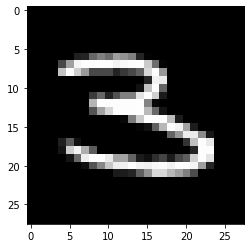

In [25]:
plt.imshow(X=X_train[7800],cmap='gray')
plt.show()

### Model Building

#### Step 1 : Building Architecture

In [26]:
model=Sequential()

In [27]:
model.add(Flatten(input_shape=(28,28,1)))
model.add(Dense(units=50,activation='relu'))
model.add(Dense(units=10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 50)                39250     
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


#### Step 2 : Model Compile

In [28]:
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics='accuracy')

### Model Training

In [29]:
training_history=model.fit(x=X_train,y=y_train,batch_size=32,epochs=10,validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3112 - accuracy: 0.9122 - val_loss: 0.1888 - val_accuracy: 0.9450
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1687 - accuracy: 0.9516 - val_loss: 0.1482 - val_accuracy: 0.9568
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1315 - accuracy: 0.9625 - val_loss: 0.1384 - val_accuracy: 0.9616
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1120 - accuracy: 0.9680 - val_loss: 0.1174 - val_accuracy: 0.9664
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0987 - accuracy: 0.9725 - val_loss: 0.1114 - val_accuracy: 0.9687
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0890 - accuracy: 0.9753 - val_loss: 0.1213 - val_accuracy: 0.9670
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0812 - accuracy: 0.9775 - val_loss: 0.1090 - val_accuracy:

### Model Testing

In [30]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1112 - accuracy: 0.9719


[0.11115500330924988, 0.9718999862670898]

### Model Prediction

In [31]:
y_pred=model.predict(X_test)

313/313 [==============================] - 0s 774us/step


In [32]:
y_test[1999]

5

In [33]:
np.argmax(y_pred[1999])

5

### Model Performance

In [34]:
training_history.history

{'loss': [0.31121447682380676,
  0.16865402460098267,
  0.13146696984767914,
  0.11203160881996155,
  0.09872806817293167,
  0.08902007341384888,
  0.08124978840351105,
  0.07634230703115463,
  0.07112853974103928,
  0.06662972271442413],
 'accuracy': [0.9121999740600586,
  0.9515500068664551,
  0.9625166654586792,
  0.9680333137512207,
  0.9724500179290771,
  0.9753166437149048,
  0.9774666428565979,
  0.9788166880607605,
  0.980566680431366,
  0.9822333455085754],
 'val_loss': [0.1888270527124405,
  0.14822597801685333,
  0.13839329779148102,
  0.11735089123249054,
  0.11139969527721405,
  0.12131741642951965,
  0.10896167904138565,
  0.11156423389911652,
  0.10660241544246674,
  0.11115500330924988],
 'val_accuracy': [0.9449999928474426,
  0.9567999839782715,
  0.9616000056266785,
  0.9664000272750854,
  0.9686999917030334,
  0.9670000076293945,
  0.9696000218391418,
  0.97079998254776,
  0.972599983215332,
  0.9718999862670898]}

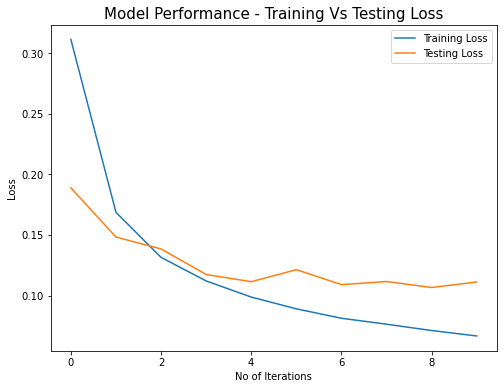

In [35]:
plt.figure(figsize=(8,6))
plt.plot(training_history.history['loss'],label='Training Loss')
plt.plot(training_history.history['val_loss'],label='Testing Loss')
plt.title('Model Performance - Training Vs Testing Loss',size=15)
plt.xlabel('No of Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

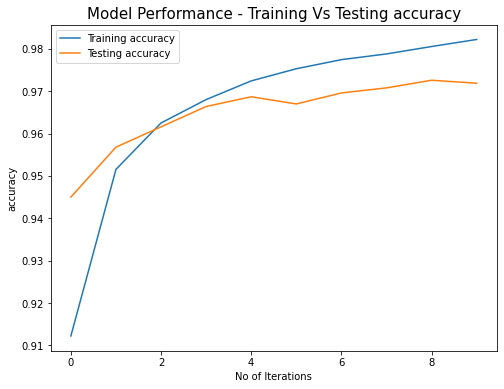

In [36]:
plt.figure(figsize=(8,6))
plt.plot(training_history.history['accuracy'],label='Training accuracy')
plt.plot(training_history.history['val_accuracy'],label='Testing accuracy')
plt.title('Model Performance - Training Vs Testing accuracy',size=15)
plt.xlabel('No of Iterations')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## Checking Model Performance by changing Optimizer

#### Step 2 : Model Compile

In [37]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

### Model Training

In [38]:
training_history=model.fit(x=X_train,y=y_train,batch_size=32,epochs=10,validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0644 - accuracy: 0.9824 - val_loss: 0.1021 - val_accuracy: 0.9721
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0540 - accuracy: 0.9837 - val_loss: 0.1035 - val_accuracy: 0.9720
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0457 - accuracy: 0.9862 - val_loss: 0.0962 - val_accuracy: 0.9743
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0398 - accuracy: 0.9877 - val_loss: 0.0957 - val_accuracy: 0.9739
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0351 - accuracy: 0.9888 - val_loss: 0.1038 - val_accuracy: 0.9727
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0310 - accuracy: 0.9902 - val_loss: 0.1021 - val_accuracy: 0.9736
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0282 - accuracy: 0.9915 - val_loss: 0.0954 - val_accuracy:

### Model Testing

In [39]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1065 - accuracy: 0.9744


[0.10649116337299347, 0.974399983882904]

### Model Prediction

In [40]:
y_pred=model.predict(X_test)

313/313 [==============================] - 0s 987us/step


In [41]:
y_test[1999]

5

In [42]:
np.argmax(y_pred[1999])

5

### Model Performance

In [43]:
training_history.history

{'loss': [0.06441386789083481,
  0.05402639880776405,
  0.045674361288547516,
  0.03977295383810997,
  0.035148169845342636,
  0.030994290485978127,
  0.02822761796414852,
  0.025382110849022865,
  0.02225731872022152,
  0.019014935940504074],
 'accuracy': [0.9823833107948303,
  0.9837499856948853,
  0.9861999750137329,
  0.9877499938011169,
  0.9887833595275879,
  0.9902499914169312,
  0.9914500117301941,
  0.9921166896820068,
  0.9927499890327454,
  0.9943166375160217],
 'val_loss': [0.10208284854888916,
  0.10347837954759598,
  0.09616753458976746,
  0.09565186500549316,
  0.10376911610364914,
  0.10205371677875519,
  0.09538421034812927,
  0.10715805739164352,
  0.10319652408361435,
  0.10649116337299347],
 'val_accuracy': [0.972100019454956,
  0.972000002861023,
  0.9743000268936157,
  0.9739000201225281,
  0.9726999998092651,
  0.9735999703407288,
  0.9750000238418579,
  0.9728000164031982,
  0.973800003528595,
  0.974399983882904]}

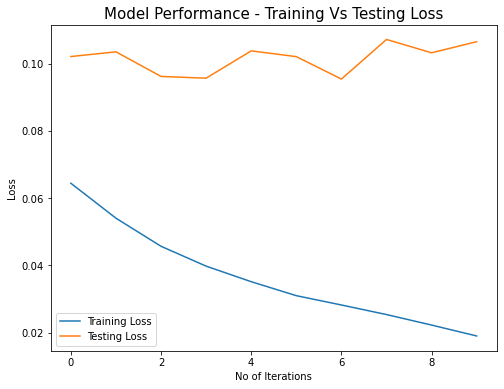

In [44]:
plt.figure(figsize=(8,6))
plt.plot(training_history.history['loss'],label='Training Loss')
plt.plot(training_history.history['val_loss'],label='Testing Loss')
plt.title('Model Performance - Training Vs Testing Loss',size=15)
plt.xlabel('No of Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

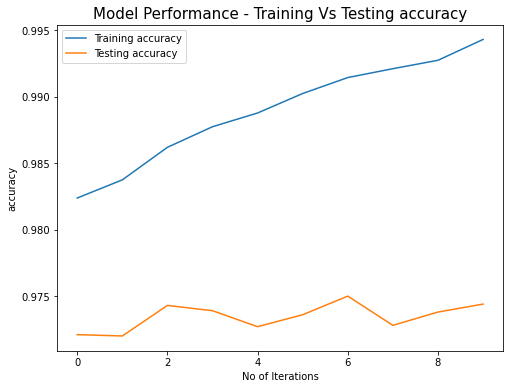

In [45]:
plt.figure(figsize=(8,6))
plt.plot(training_history.history['accuracy'],label='Training accuracy')
plt.plot(training_history.history['val_accuracy'],label='Testing accuracy')
plt.title('Model Performance - Training Vs Testing accuracy',size=15)
plt.xlabel('No of Iterations')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## Checking Model Performance by tweeking Optimizer Parameters

In [46]:
opt=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False)

#### Step 2 : Model Compile

In [47]:
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics='accuracy')

### Model Training

In [48]:
training_history=model.fit(x=X_train,y=y_train,batch_size=32,epochs=10,validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0112 - accuracy: 0.9976 - val_loss: 0.1056 - val_accuracy: 0.9739
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0092 - accuracy: 0.9983 - val_loss: 0.1059 - val_accuracy: 0.9739
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0079 - accuracy: 0.9988 - val_loss: 0.1034 - val_accuracy: 0.9749
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0070 - accuracy: 0.9990 - val_loss: 0.1070 - val_accuracy: 0.9745
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0065 - accuracy: 0.9991 - val_loss: 0.1069 - val_accuracy: 0.9751
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0060 - accuracy: 0.9992 - val_loss: 0.1081 - val_accuracy: 0.9752
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0055 - accuracy: 0.9994 - val_loss: 0.1091 - val_accuracy:

### Model Testing

In [49]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1111 - accuracy: 0.9743


[0.11113381385803223, 0.9743000268936157]

### Model Prediction

In [50]:
y_pred=model.predict(X_test)

313/313 [==============================] - 0s 979us/step


In [51]:
y_test[1999]

5

In [52]:
np.argmax(y_pred[1999])

5

### Model Performance

In [53]:
training_history.history

{'loss': [0.011189082637429237,
  0.009166928939521313,
  0.00787353701889515,
  0.006962779443711042,
  0.006515453569591045,
  0.006025031674653292,
  0.005510490853339434,
  0.005255665630102158,
  0.004597384948283434,
  0.004381104838103056],
 'accuracy': [0.9976166486740112,
  0.9983166456222534,
  0.9988166689872742,
  0.9990000128746033,
  0.9991333484649658,
  0.9991666674613953,
  0.9994000196456909,
  0.9993833303451538,
  0.9995499849319458,
  0.9996333122253418],
 'val_loss': [0.1056315079331398,
  0.10592199862003326,
  0.10340028256177902,
  0.10704013705253601,
  0.10692766308784485,
  0.10812158137559891,
  0.10905645787715912,
  0.11183761060237885,
  0.10973227769136429,
  0.11113381385803223],
 'val_accuracy': [0.9739000201225281,
  0.9739000201225281,
  0.9749000072479248,
  0.9745000004768372,
  0.9750999808311462,
  0.9751999974250793,
  0.9743000268936157,
  0.9746999740600586,
  0.9753999710083008,
  0.9743000268936157]}

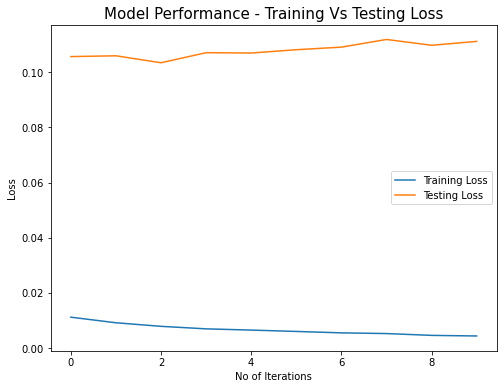

In [54]:
plt.figure(figsize=(8,6))
plt.plot(training_history.history['loss'],label='Training Loss')
plt.plot(training_history.history['val_loss'],label='Testing Loss')
plt.title('Model Performance - Training Vs Testing Loss',size=15)
plt.xlabel('No of Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

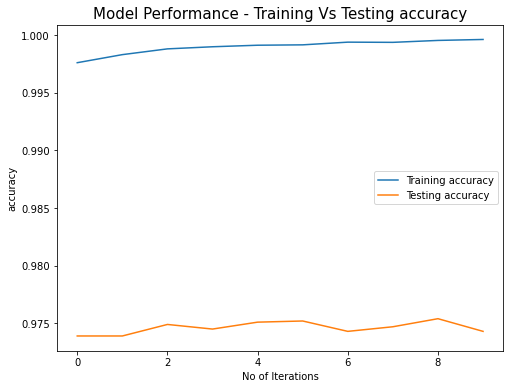

In [55]:
plt.figure(figsize=(8,6))
plt.plot(training_history.history['accuracy'],label='Training accuracy')
plt.plot(training_history.history['val_accuracy'],label='Testing accuracy')
plt.title('Model Performance - Training Vs Testing accuracy',size=15)
plt.xlabel('No of Iterations')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## Checking Model Performance by using Ada Grad Optimizer

In [56]:
optimi=keras.optimizers.Adagrad(learning_rate=0.01,initial_accumulator_value=0.1,epsilon=1e-07)

#### Step 2 : Model Compile

In [57]:
model.compile(optimizer=optimi,loss='sparse_categorical_crossentropy',metrics='accuracy')

### Model Training

In [58]:
training_history=model.fit(x=X_train,y=y_train,batch_size=32,epochs=10,validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0035 - accuracy: 0.9998 - val_loss: 0.1110 - val_accuracy: 0.9755
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0033 - accuracy: 0.9998 - val_loss: 0.1114 - val_accuracy: 0.9752
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0033 - accuracy: 0.9998 - val_loss: 0.1116 - val_accuracy: 0.9754
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0032 - accuracy: 0.9999 - val_loss: 0.1118 - val_accuracy: 0.9755
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0031 - accuracy: 0.9998 - val_loss: 0.1120 - val_accuracy: 0.9751
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0031 - accuracy: 0.9998 - val_loss: 0.1119 - val_accuracy: 0.9750
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0030 - accuracy: 0.9998 - val_loss: 0.1123 - val_accuracy:

### Model Testing

In [59]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1130 - accuracy: 0.9750


[0.11301236599683762, 0.9750000238418579]

### Model Prediction

In [60]:
y_pred=model.predict(X_test)

313/313 [==============================] - 0s 979us/step


In [61]:
y_test[1999]

5

In [62]:
np.argmax(y_pred[1999])

5

### Model Performance

In [63]:
training_history.history

{'loss': [0.003522147424519062,
  0.0033231822308152914,
  0.0032592392526566982,
  0.003196229226887226,
  0.0031448430381715298,
  0.0030878612305969,
  0.0030358850490301847,
  0.0029932339675724506,
  0.002941267564892769,
  0.0028898988384753466],
 'accuracy': [0.9997666478157043,
  0.9998000264167786,
  0.9997833371162415,
  0.9998666644096375,
  0.9998499751091003,
  0.9998499751091003,
  0.9998499751091003,
  0.9998833537101746,
  0.9998833537101746,
  0.999833345413208],
 'val_loss': [0.11096352338790894,
  0.11137403547763824,
  0.11155867576599121,
  0.11184793710708618,
  0.11195004731416702,
  0.11194562911987305,
  0.11233668029308319,
  0.11261264979839325,
  0.11289040744304657,
  0.11301236599683762],
 'val_accuracy': [0.9754999876022339,
  0.9751999974250793,
  0.9753999710083008,
  0.9754999876022339,
  0.9750999808311462,
  0.9750000238418579,
  0.9753000140190125,
  0.9751999974250793,
  0.9753000140190125,
  0.9750000238418579]}

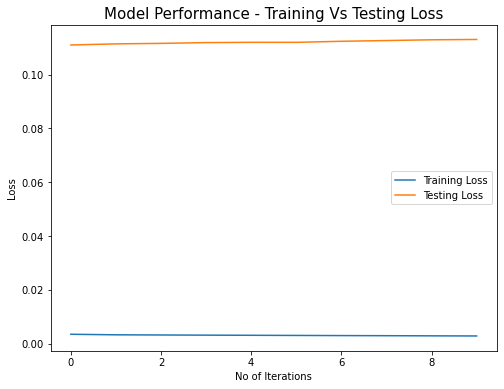

In [64]:
plt.figure(figsize=(8,6))
plt.plot(training_history.history['loss'],label='Training Loss')
plt.plot(training_history.history['val_loss'],label='Testing Loss')
plt.title('Model Performance - Training Vs Testing Loss',size=15)
plt.xlabel('No of Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

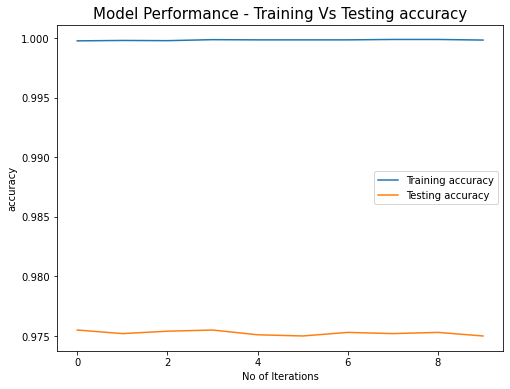

In [65]:
plt.figure(figsize=(8,6))
plt.plot(training_history.history['accuracy'],label='Training accuracy')
plt.plot(training_history.history['val_accuracy'],label='Testing accuracy')
plt.title('Model Performance - Training Vs Testing accuracy',size=15)
plt.xlabel('No of Iterations')
plt.ylabel('accuracy')
plt.legend()
plt.show()

### End !!!